## <center> PLI Violations Found in Pittsburgh Neighborhoods </center>

---

### Background

For one of our criteias for the "Best Neighborhood in Pittsburgh", we decided to see how many PLI violations were detected in each of the neighborhoods. In the city of Pittsburgh, there is a department named the Department of Permits, Licenses and Inspections Code Enforcemnt that strives to regulate and protect the "health, safety and welfare in existing buildings and structures" (https://pittsburghpa.gov/pli/pli-code-enforcement). Also according to the website, it states that some offenses that are considered PLI violations are:

- Sidewalks that are considered tripping hazards
- Electrical, building and/or zoning violations
- Debris on property
- Issues caused by animals
- Sewage problems

Since the metric of ranking the "Best Neighborhood in Pittsburgh" that we are using is finding the neighborhood with the least amount of offenses or crimes, we think that using the PLI violations dataset would be a beneficial tool to help us find a conclusion for our ranking. A neighborhood with low occurrences of these violations would signify that the area for the most part is abiding by the rules and regulations that the city of Pittsburgh tries to uphold. This would definitely help narrow down the options for finding a neighborhood worthy enough to be considered the best in Pittsburgh.

**The dataset that we will be using has data spanning from 2015 to 2020.**

---

### Working with the Data

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt # Importing the neccesssary libraries to be able to work with the data and plot the graphs

pli_violations = pd.read_csv("pli_violations_data.csv") # Importing the data from the .csv file

Before we begin to work with the data, let's inspect the details of the dataset and see what information is given to us.

In [4]:
pli_violations.info() # Looking at the type of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53123 entries, 0 to 53122
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STREET_NUM             53110 non-null  float64
 1   STREET_NAME            53123 non-null  object 
 2   INSPECTION_DATE        53123 non-null  object 
 3   CASE_NUMBER            53123 non-null  object 
 4   INSPECTION_RESULT      53123 non-null  object 
 5   DPW_REQUEST            2098 non-null   object 
 6   VIOLATION              53123 non-null  object 
 7   LOCATION               53123 non-null  object 
 8   CORRECTIVE_ACTION      53123 non-null  object 
 9   PARCEL                 53123 non-null  object 
 10  NEIGHBORHOOD           53066 non-null  object 
 11  COUNCIL_DISTRICT       53069 non-null  float64
 12  WARD                   53069 non-null  float64
 13  TRACT                  53069 non-null  float64
 14  PUBLIC_WORKS_DIVISION  53069 non-null  float64
 15  PL

In [5]:
len(pli_violations) # How many reports there are in the data

53123

Based on the data, we can see that there are **53,123** total reported violations. This is a lot of data to sift through! Also, there are two important columns that are present in the dataset, **"INSPECTION_RESULT"** and **"NEIGHBORHOOD"**. Let's keep these columns in mind when we look at the data. Also, let's see what the data actually looks like and what kind of results we get.

In [6]:
pli_violations.head() # Showing the first 5 rows of data to see what the data looks like

,STREET_NUM,STREET_NAME,INSPECTION_DATE,CASE_NUMBER,INSPECTION_RESULT,DPW_REQUEST,VIOLATION,LOCATION,CORRECTIVE_ACTION,PARCEL,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y
0,7809.0,SUSQUEHANNA ST,2016-08-09,O-787281,Violations Found,NaN,2003 IPMC 301.3 Vacant structures and land :: ...,Secure Property :: Cut and clear all overgrowt...,301.3 Vacant structures and land. All vacant s...,0175G00080000000,Homewood South,9.0,13.0,130400.0,2.0,13.0,5.0,3-17,-79.888578,40.449926
1,249.0,E MEYERS AVE,2017-01-23,O-786866,Violations Found,NaN,2003 IPMC 302.4 Weeds :: 2003 IPMC 307.1 Accum...,Throughout property :: Throughout property :: ...,Overgrown throughout property. Cut all overgro...,0060H00150000000,Carrick,4.0,29.0,290200.0,4.0,29.0,3.0,4-12,-79.983902,40.401018
2,225.0,FIFTH AVE,2017-07-28,O-1052529,Abated,NaN,2003 IFC 107.2.1 Test and inspection records,3 PNC PLACE 225 FIFTH AVE,Failure to maintain annual fire alarm inspecti...,0001D0017300AH00,Central Business District,6.0,2.0,20100.0,6.0,2.0,2.0,1-3,-80.001301,40.441294
3,264.0,PLYMOUTH ST,2017-06-23,O-1048951,Abated,NaN,2003 IPMC 302.8 Motor vehicles :: 2003 IPMC 30...,2 inoperative vehicles in the rear :: Overgrow...,no inoperative or unlicensed motor vehicle sha...,0006R00250000000,Duquesne Heights,2.0,19.0,191100.0,5.0,19.0,3.0,4-1,-80.021747,40.434457
4,2205.0,BERNARD ST,2016-11-15,O-947319,Abated,NaN,City Code 922.02 - Occupancy Permits,Rear of property,Apply for occupancy permit for rear deck.Apply...,0096R00094000000,Overbrook,4.0,32.0,320700.0,4.0,32.0,3.0,4-25,-80.005387,40.386590


In the column **"INSPECTION_RESULT"**, we can see two different results from just the first 5 pieces of data in the dataset, "Violations Found" and "Abated". "Abated" means that the report was considered to be not significant enough to be considered a violation, so we will remove these from the dataset. But first, let's make sure if there are any other results besides the two that were previously mentioned.

In [7]:
pli_violations['INSPECTION_RESULT'].unique()

array(['Violations Found', 'Abated', 'Voided'], dtype=object)

Besides the two previously mentioned results, we see that there is a third one, "Voided". "Voided" and "Abated" will be removed from the dataset, as we are only concerned with the reported instances that actually had violations that were discovered. 

In [8]:
violations_found_mask =  pli_violations['INSPECTION_RESULT'] == "Violations Found" # Creating a query mask that only looks at reported violations that actually had violations found
violations_found_data = pli_violations[violations_found_mask]
violations_found_data.head()   # The first 5 rows of the new dataset

,STREET_NUM,STREET_NAME,INSPECTION_DATE,CASE_NUMBER,INSPECTION_RESULT,DPW_REQUEST,VIOLATION,LOCATION,CORRECTIVE_ACTION,PARCEL,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y
0,7809.0,SUSQUEHANNA ST,2016-08-09,O-787281,Violations Found,NaN,2003 IPMC 301.3 Vacant structures and land :: ...,Secure Property :: Cut and clear all overgrowt...,301.3 Vacant structures and land. All vacant s...,0175G00080000000,Homewood South,9.0,13.0,130400.0,2.0,13.0,5.0,3-17,-79.888578,40.449926
1,249.0,E MEYERS AVE,2017-01-23,O-786866,Violations Found,NaN,2003 IPMC 302.4 Weeds :: 2003 IPMC 307.1 Accum...,Throughout property :: Throughout property :: ...,Overgrown throughout property. Cut all overgro...,0060H00150000000,Carrick,4.0,29.0,290200.0,4.0,29.0,3.0,4-12,-79.983902,40.401018
6,1321.0,JEFFERS ST,2017-01-10,O-902559,Violations Found,NaN,2003 IPMC 302.4 Weeds,ALL EXTERIOR PROPERTY MUST BE FREE FROM WEEDS ...,CUT AND CLEAN OVERGROWTH,0042N00313000000,Sheraden,2.0,20.0,202200.0,5.0,20.0,6.0,1-16,-80.065058,40.453192
11,1014.0,ABDELL ST,2016-07-06,O-794377,Violations Found,NaN,2003 IPMC 301.3 Vacant structures and land :: ...,VACANT UNSECURE STRUCTURE :: FRONT PORCH :: RO...,ALL VACANT STRUCTURES SHALL BE MAINTAINED IN A...,0007D00010000000,Manchester,6.0,21.0,210700.0,1.0,21.0,1.0,1-8,-80.019911,40.452682
13,117.0,EILER AVE,2016-07-19,O-784815,Violations Found,NaN,2003 IPMC 301.3 Vacant structures and land :: ...,Doors :: Windows :: Rear porch :: Front porch ...,Doors are broken and building is not secured. ...,0095H00289000000,Carrick,4.0,29.0,290200.0,4.0,29.0,3.0,4-12,-79.984552,40.391541


When comparing to the previous dataset, we can now see that the "Abated" violations are removed from the dataset. Now that the dataset only shows instances of violations that were actually found, let's insure that there are no null values in either the **"INSPECTION_RESULT"** or **"NEIGHBORHOOD"** columns.

In [9]:
adjusted_data_set = violations_found_data.dropna(subset = ['INSPECTION_RESULT', 'NEIGHBORHOOD'])    # Method found on https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html    

Now that we have our final data that only shows violations that were found with no null values in the two previously mentioned columns, let's see the amount of reports we are now working with

In [10]:
len(adjusted_data_set)

16840

In [11]:
len(pli_violations) - len(adjusted_data_set) # The amount of reports from the first dataset minus the amount of reports from the new dataset, which equals the amount of reports removed in the new dataset

36283

The new dataset now has **16,840** reports that had discovered violations. The query mask has significantly reduced the amount of reports present in the dataset (from the calculation above, **36,283** entries were removed). Let's also see how many neighborhoods and which neighborhoods we're working with

In [12]:
adjusted_data_set['NEIGHBORHOOD'].unique()   # What neighborhoods we are working with

array(['Homewood South', 'Carrick', 'Sheraden', 'Manchester',
       'Squirrel Hill South', 'Middle Hill', 'Bloomfield',
       'South Side Flats', 'Homewood North', 'Allentown', 'Elliott',
       'Garfield', 'Troy Hill', 'Mt. Oliver', 'Lincoln Place', 'Oakwood',
       'Hazelwood', 'Brookline', 'Fineview', 'Arlington', 'Beechview',
       'Upper Hill', 'Marshall-Shadeland', 'Knoxville', 'South Oakland',
       'Mount Washington', 'East Allegheny', 'Lincoln-Lemington-Belmar',
       'Beltzhoover', 'Esplen', 'Bedford Dwellings',
       'Spring Hill-City View', 'Central Northside', 'Perry South',
       'Windgap', 'Friendship', 'Squirrel Hill North', 'Homewood West',
       'East Liberty', 'Crawford-Roberts', 'Upper Lawrenceville',
       'Perry North', 'Spring Garden', 'North Oakland', 'Chartiers City',
       'Central Lawrenceville', 'Central Oakland', 'South Side Slopes',
       'Polish Hill', 'Crafton Heights', 'Greenfield', 'Bluff',
       'St. Clair', 'Brighton Heights', 'Duquesne 

In [13]:
len(adjusted_data_set['NEIGHBORHOOD'].unique())   # To see how many total neighborhoods we are working with

90

---

### Graphing the Data (Part 1: Visualizing the Data)

For this dataset, we've decided to graph the data using a bar graph, as it is easier to see visually how each neighborhood compares in terms of how many violations have been reported and found in each area. The X-axis will comprise of each of the neighborhoods in the dataset and the Y-axis will be the amount of violations that have occurred in each of these neighborhoods.

Text(0, 0.5, 'Amount of Violations Found')

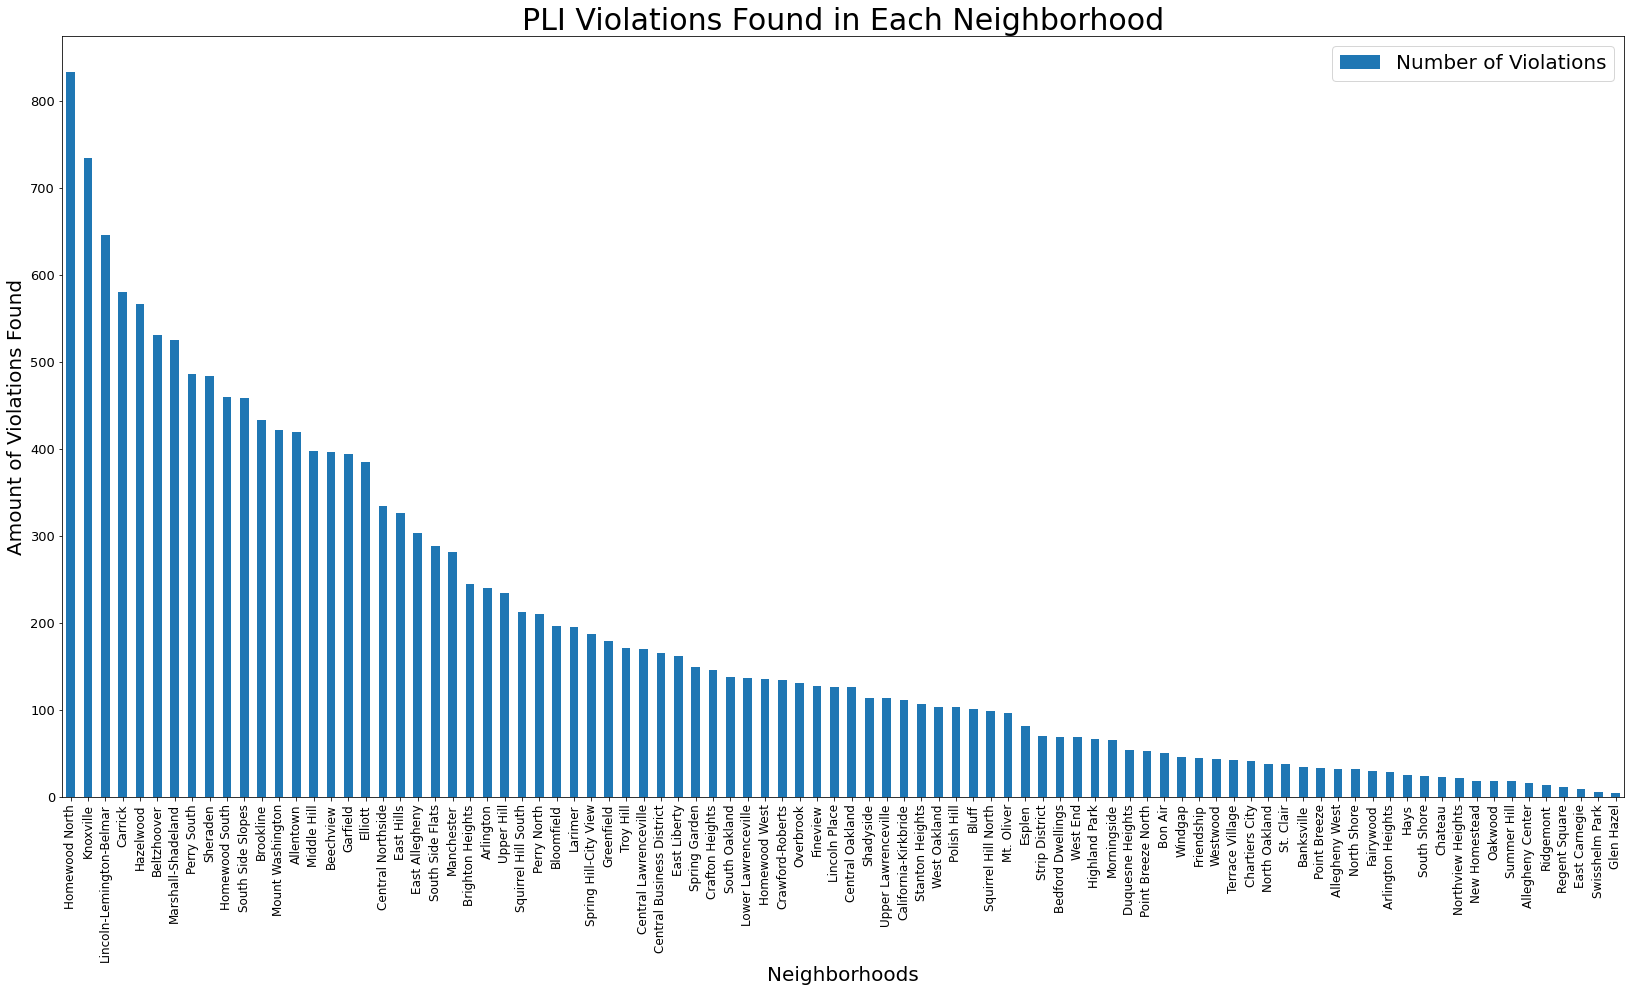

In [14]:
adjusted_data_set['NEIGHBORHOOD'].value_counts().plot.bar(figsize =(28,14)) # Creating a bar graph with each bar signifying how many 
plt.title("PLI Violations Found in Each Neighborhood", size = 30) # Adding a title to the graph and adjusting the size of it
plt.xlabel("Neighborhoods", size = 20)    # Labeling the X-axis and adjusting the size of the label
plt.legend(['Number of Violations'], prop = {'size': 20})      # Creating a legend (size adjustment found: https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot)
plt.xticks(size = 12)  # Adjusting the size of all of the X-axis ticks
plt.yticks(size = 13) # Adjusting the size of all of the Y-axis ticks
plt.ylabel("Amount of Violations Found", size = 20) # Labeling the Y-axis and adjusting the size of the label


From the looks of the graph, we can see which neighborhoods have an abundance of violations that were found. The graph seems very cluttered due to the amount of "values" in the X-axis. Because of the high instances of violations found in the neighborhoods that are located at the left of the graph, we can assume that these would not be contenders for the "Best Neighborhood in Pittsburgh", so we will remove them from the graph and focus on the ones with lower instances. For the new data, we will only focus on the neighborhoods that are located to the right of **Crafton Heights** on the graph.

In [15]:
(adjusted_data_set['NEIGHBORHOOD'] == "Crafton Heights").value_counts() # This is to see how many times Crafton Heights has appeared in the dataset

False    16694
True       146
Name: NEIGHBORHOOD, dtype: int64

We now see that the neighborhood of **Crafton Heights** has had **146** seperate instances of violations found in the neighborhood. With this number, we will now find out how many neighborhoods have less than 146 instances of violations.

In [16]:
(adjusted_data_set['NEIGHBORHOOD'].value_counts() < 146).value_counts() # Counting how many neighborhoods have below 146 instances of violations found

True     52
False    38
Name: NEIGHBORHOOD, dtype: int64

We now know that 52 of the 90 total neighborhoods in the dataset have below 146 instances of violations that were found. We will now only graph those neighborhoods and remove the other 38 from the set to make the graph easier to read.

Text(0, 0.5, 'Amount of Violations Found')

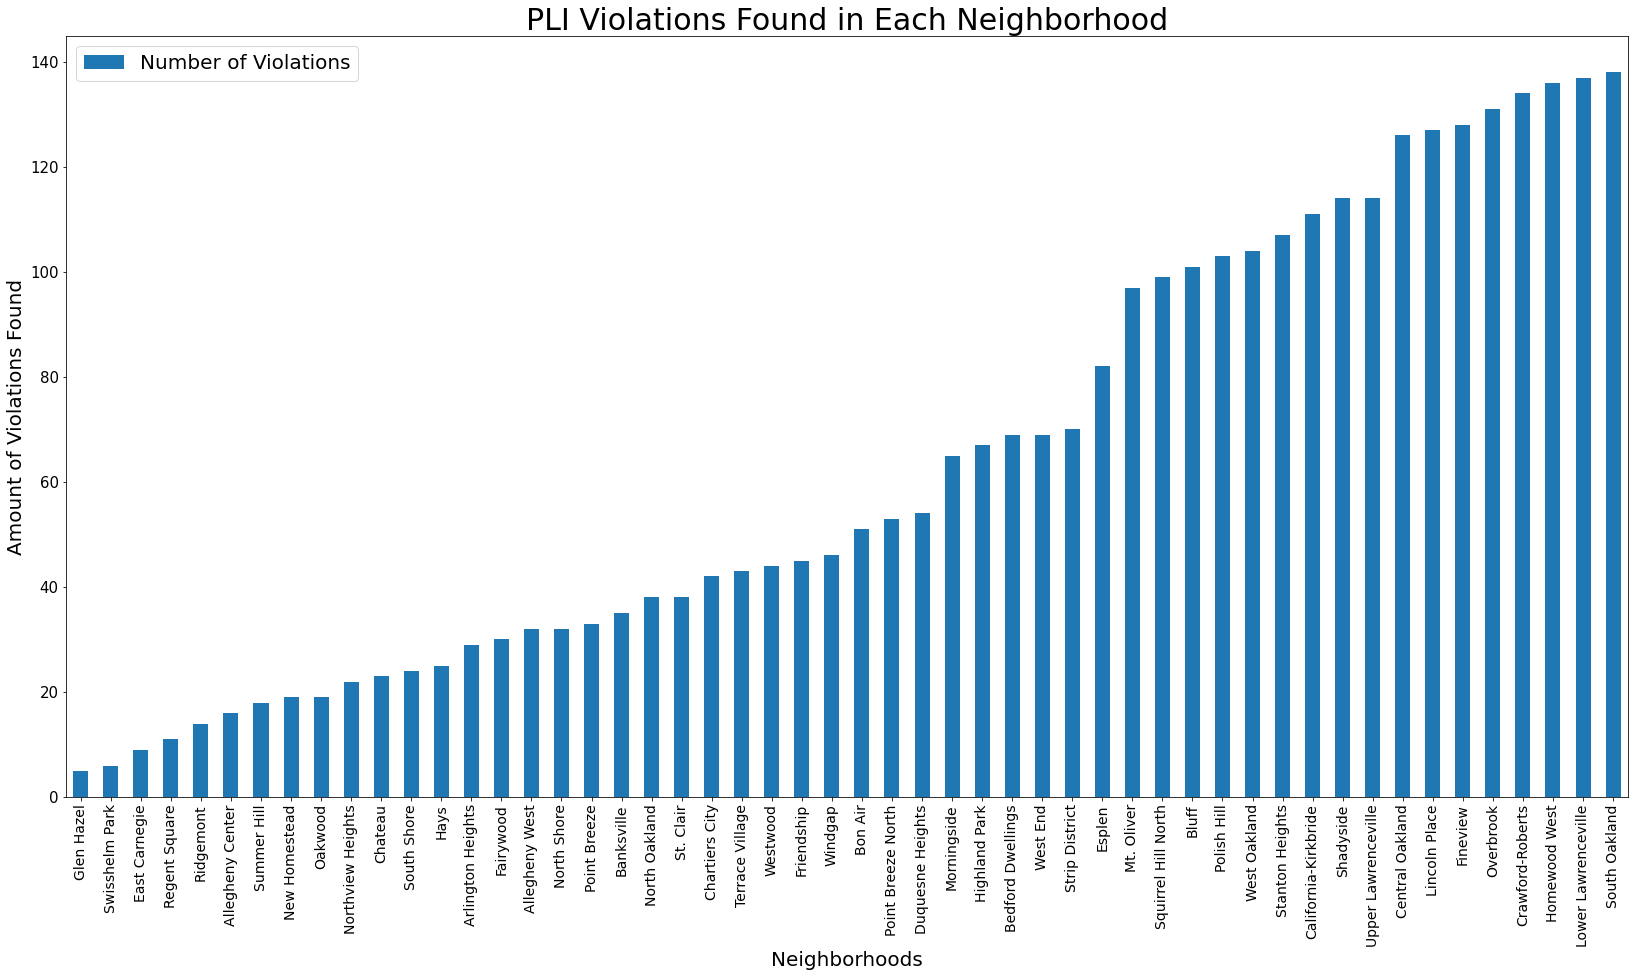

In [17]:
smallest_violations = pd.DataFrame({"Number of Violations" : adjusted_data_set["NEIGHBORHOOD"].value_counts().nsmallest(52)}) # Graphing the 52 smallest neighborhoods in the dataset
smallest_violations.plot.bar(figsize =(28,14))
plt.title("PLI Violations Found in Each Neighborhood", size = 30)
plt.xlabel("Neighborhoods", size = 20)                               # Identical to the first graph that was plotted
plt.xticks(size = 14) 
plt.yticks(size = 15)
plt.legend(prop = {'size': 20})
plt.ylabel("Amount of Violations Found", size = 20) 


Because the new graph just removed 38 values from the X-axis (including the outliers), the bar graph is now much easier to read. For the next section, we will now primarily focus on the top ten neighborhoods with the least amount of violations

---

### Graphing the Data (Part 2: Top Ten Neighborhoods)

We will now graph the top ten neighborhoods that have the least amount of PLI violations and create a table showing each of the neighborhoods in the top ten with the amount of PLI violations found.

Text(0, 0.5, 'Amount of Violations Found')

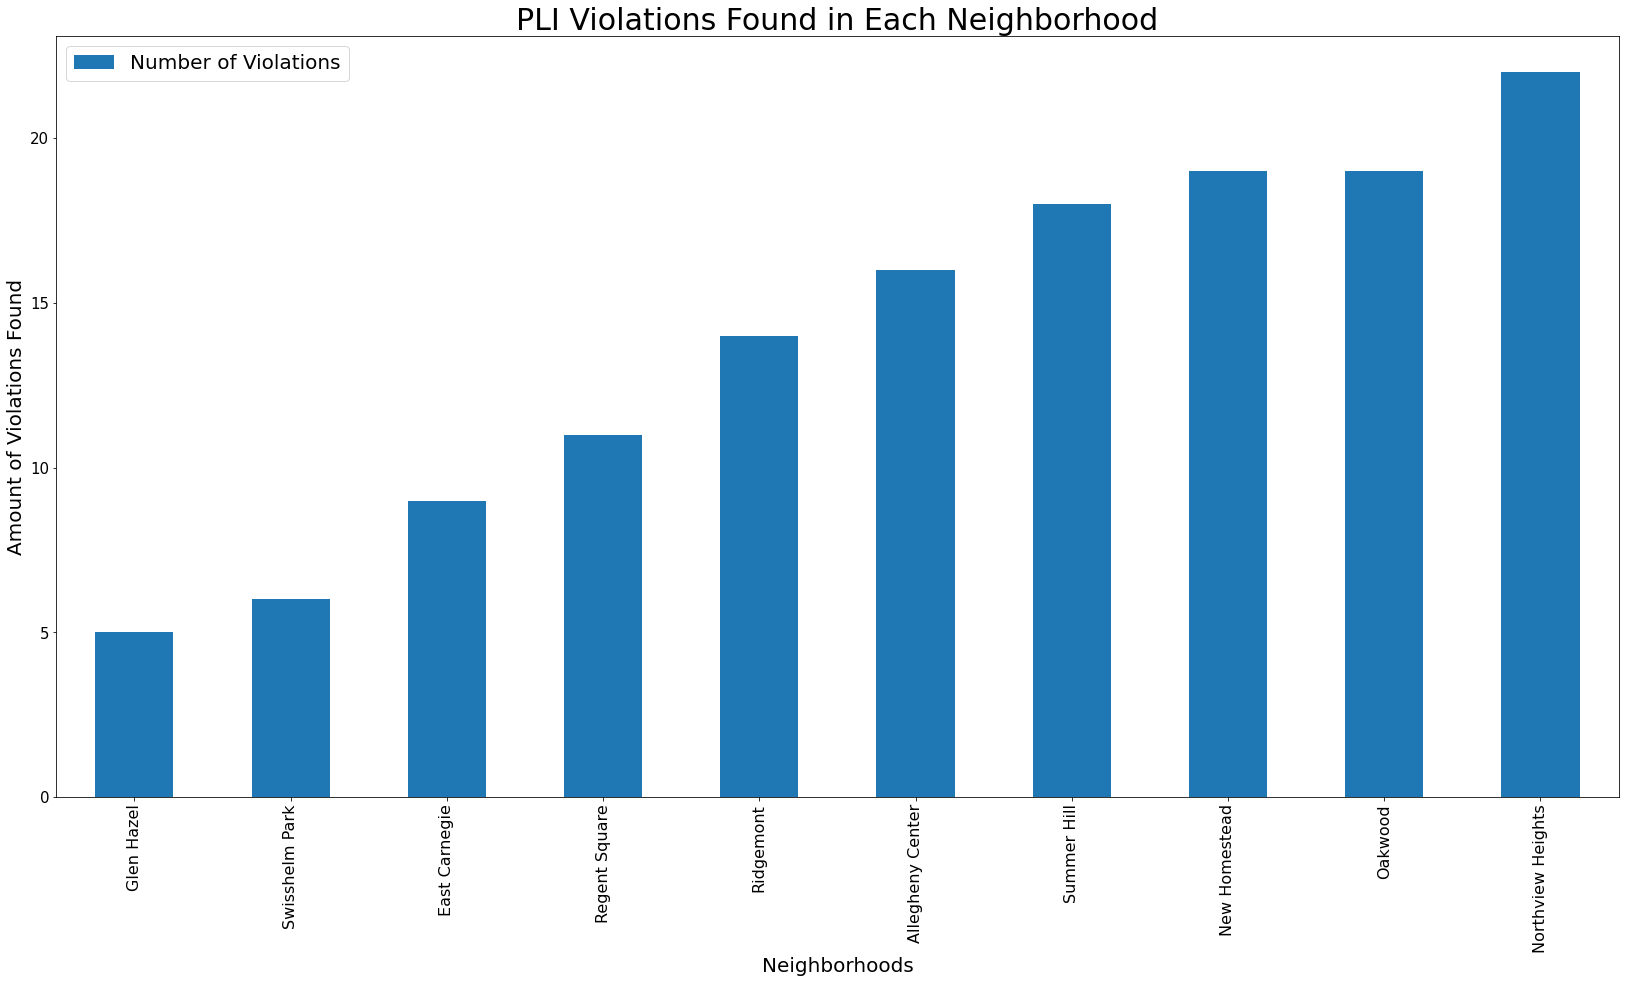

In [34]:
top_ten_smallest = pd.DataFrame({"Number of Violations" : adjusted_data_set["NEIGHBORHOOD"].value_counts().nsmallest(10)}) # Graphing the 10 neighborhoods in the dataset with the lowest amout of PLI violations
top_ten_smallest.plot.bar(figsize =(28,14))
plt.title("PLI Violations Found in Each Neighborhood", size = 30)
plt.xlabel("Neighborhoods", size = 20)                               # Identical to the first and second graph that I plotted before
plt.xticks(size = 16)
plt.yticks(size = 15)
plt.legend(prop = {'size': 20})
plt.ylabel("Amount of Violations Found", size = 20) 


In [20]:
pli = pd.DataFrame( {"Number of Violations" : adjusted_data_set['NEIGHBORHOOD'].value_counts().nsmallest(10)})
pli

,Number of Violations
Glen Hazel,5
Swisshelm Park,6
East Carnegie,9
Regent Square,11
Ridgemont,14
Allegheny Center,16
Summer Hill,18
New Homestead,19
Oakwood,19
Northview Heights,22


The graph and table above show the ten neighborhoods with the lowest amount of violations found. Now, we will calculate the percentage of PLI violations each neighborhood had contributed to the total amount found, which was **16,840**. This will be important later to calculate the metric for the "Best Neighborhood in Pittsburgh".

In [42]:
pli_scores = pd.DataFrame( {'Percentage of Violations' : adjusted_data_set['NEIGHBORHOOD'].value_counts()/16840})  # Calculating the percentage of PLI violations for each neighborhood
pli_scores.reset_index(inplace=True)  # Resetting index to easily merge the data for conclusion
pli_scores.nsmallest(10, columns = 'Percentage of Violations')

,index,Percentage of Violations
89,Glen Hazel,0.000297
88,Swisshelm Park,0.000356
87,East Carnegie,0.000534
86,Regent Square,0.000653
85,Ridgemont,0.000831
84,Allegheny Center,0.000950
83,Summer Hill,0.001069
81,New Homestead,0.001128
82,Oakwood,0.001128
80,Northview Heights,0.001306


In [36]:
rank = pd.DataFrame( {'Rank' : [1,2,3,4,5,6,7,8,9,10]}) # Creating a rank dataframe to rank the neighborhoods

In [44]:
pli_ranked = pd.DataFrame({'Neighborhood' : pli['index'], 'Rank' : rank['Rank']})
pli_ranked

,Neighborhood,Rank
0,Glen Hazel,1
1,Swisshelm Park,2
2,East Carnegie,3
3,Regent Square,4
4,Ridgemont,5
5,Allegheny Center,6
6,Summer Hill,7
7,New Homestead,8
8,Oakwood,9
9,Northview Heights,10


---

### Graphing the Data (Part 3: GeoPandas)

We now have visualized all of the data (more specifically, a graph that shows every neighborhood and the amount of PLI violations that were found, a graph that has removed the neighborhoods with an abundance of violations found as these should not be contenders for the "Best Neighborhood in Pittsburgh", and also the top ten neighborhoods that would be strong contenders for the title). Now, we will visualize the graph using GeoPandas. Rather than reading off a list of neighborhoods with the amount of violations they have, it will be much easier for people to comprehend the information through this visualizaiton.

In [23]:
test = pd.DataFrame({"Number of Violations" : adjusted_data_set["NEIGHBORHOOD"].value_counts()})  # Dataset for the GeoPandas plot
test.reset_index(inplace=True)
test


,index,Number of Violations
0,Homewood North,833
1,Knoxville,735
2,Lincoln-Lemington-Belmar,646
3,Carrick,580
4,Hazelwood,567
...,...,...
85,Ridgemont,14
86,Regent Square,11
87,East Carnegie,9
88,Swisshelm Park,6


In [24]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")  # Calling in the neighborhood files to be able to plot the data

In [25]:
pli_violations_map = neighborhoods.merge(test, how='inner', left_on='hood', right_on='index') # Merging the sets and seeing if it was done correctly
pli_violations_map[['hood','Number of Violations','geometry']].head()

,hood,Number of Violations,geometry
0,Central Oakland,126,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,38,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,104,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,134,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,70,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


<AxesSubplot:>

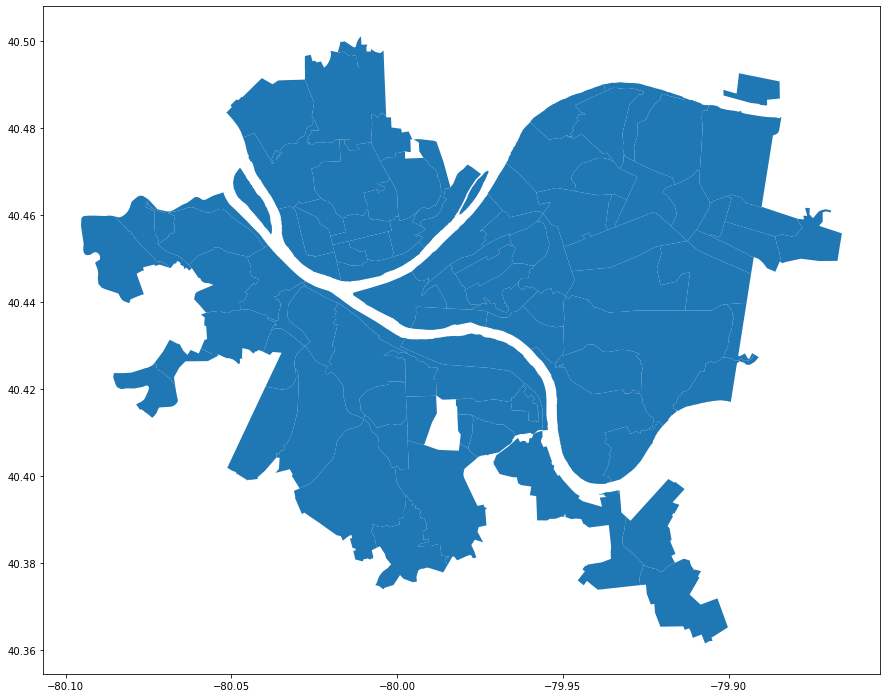

In [26]:
pli_violations_map.plot(figsize = (15,15)) # Checking to see if the map will be plotted

In [27]:
pli_violations_map.plot(column='Number of Violations', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Violations"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={'color': 'lightgrey'} # set disctricts with no data to gray
               )

/Users/joe/opt/anaconda3/envs/cmpinf0010/lib/python3.7/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer

---

### Conclusion